In [81]:
import numpy as np
import matplotlib.pyplot as plt 
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time
import astropy.units as u
import pandas as pd
from numpy.random import rand

plt.rcParams['mathtext.fontset'], plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 16})

In [16]:
df = pd.read_csv('McGill_magnetar_catalog.csv')

NAMES = df['Name']
RA = df['RA']
DEC = df['Decl']

In [48]:
mags = [SkyCoord(RA[i] + ' ' + DEC[i], unit=(u.hourangle, u.deg)) for i in range(len(RA))]

In [59]:
# Coords for OVRO
LAT, LON, ALT = 37.23, 118.28, 1222
OVRO = EarthLocation(lat=LAT, lon=LON, height=ALT)

PST = -7*u.hour
time = Time('2022-8-10 12:00:00') + PST
midnight = Time('2022-8-10 00:00:00') + PST # Change date for today's visability
hours = np.linspace(0, 24, 100)*u.hour

mags_altaz = [mags[i].transform_to(AltAz(obstime=midnight+hours, location=OVRO)) for i in range(len(mags))]

In [64]:
mags_alts = [mags_altaz[i].alt.value for i in range(len(mags_altaz))]
mags_azs = [mags_altaz[i].az.value for i in range(len(mags_altaz))]

In [158]:
len(np.arange(0, len(mags_alts)))

31

In [107]:
SGR1935 = np.argwhere([NAMES[i] == 'SGR 1935+2154' for i in range(len(NAMES))])[0][0]

lws = [1.5]*len(NAMES)
lws[SGR1935] = 5.0


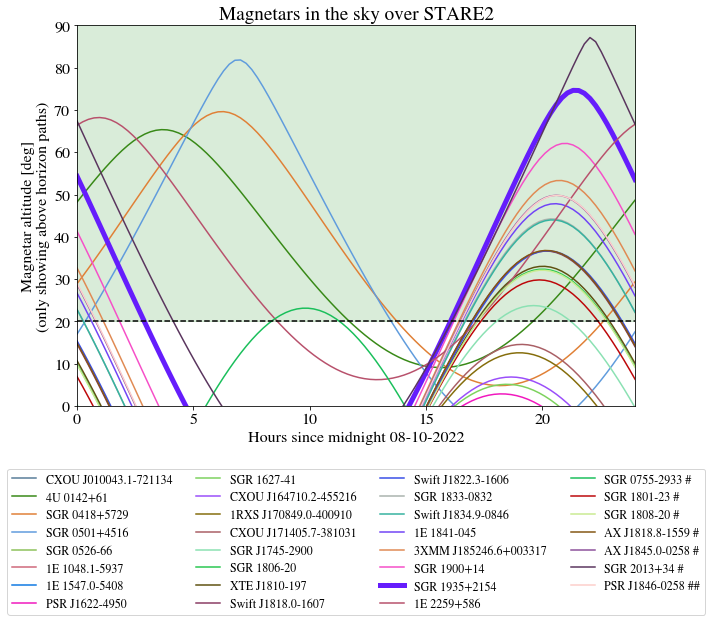

In [181]:
plt.figure(figsize=(10,7))
paths = []
for i in np.arange(0, len(mags_alts)):
    icolor=rand(3)
    path = plt.plot(hours, mags_alts[i], color=icolor, label=NAMES[i], lw=lws[i])
    paths.append(path)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=12)
plt.xlabel('Hours since midnight 08-10-2022')
plt.ylabel('Magnetar altitude [deg]\n(only showing above horizon paths)')
plt.margins(x=0, y=0.01)
plt.ylim(0, 90)
plt.title('Magnetars in the sky over STARE2')

horizon = plt.hlines(20, min(hours.value), max(hours.value), 'k', linestyles='dashed', label='STARE2 alt. limit', zorder=32)
range = plt.fill_between(hours.value, 20, 95, zorder=0, alpha=0.15, color='green', label='STARE2 observable')
# paths = np.array(paths)
# legend1 = plt.legend(handles=[paths[i] for i in np.arange(len(paths))], 
#                      loc='upper center', 
#                      bbox_to_anchor=(0.5, -0.15), 
#                      ncol=4, 
#                      fontsize=12)
# plt.gca().add_artist(legend1)
# legend2 = plt.legend(handles=[horizon, range], loc='upper left', bbox_to_anchor=(1,1), fontsize=13)


plt.show();

In [216]:
mag_alts = np.array(mags_alts)
mag_alts.shape

def visible():
    results = []
    for mag in np.arange(len(mag_alts)):
        for i in mag_alts[mag]:
            if i < 20:
                results.append(0)
            elif i > 20:
                results.append(1)
    return results

In [223]:
vis = visible()
vis = np.reshape(vis, (31, 100))

In [237]:
observable_mags = []
nonobservable_mags = []
for i in np.arange(len(vis)):
    if np.any(vis[i]==1):
        observable_mags.append(i)
    elif np.all(vis[i]==0):
        nonobservable_mags.append(i)

In [247]:
print('Number of magnetars observable by STARE2:', len(observable_mags))

Number of magnetars observable by STARE2: 22


In [251]:
print('The magnetars visible to STARE2:\n', NAMES[observable_mags])

The magnetars visible to STARE2:
 1                4U 0142+61
2             SGR 0418+5729
3             SGR 0501+4516
12           SGR J1745-2900
13              SGR 1806-20
14            XTE J1810-197
15       Swift J1818.0-1607
16       Swift J1822.3-1606
17            SGR 1833-0832
18       Swift J1834.9-0846
19              1E 1841-045
20    3XMM J185246.6+003317
21              SGR 1900+14
22            SGR 1935+2154
23              1E 2259+586
24          SGR 0755-2933 #
25            SGR 1801-23 #
26            SGR 1808-20 #
27        AX J1818.8-1559 #
28        AX J1845.0-0258 #
29            SGR 2013+34 #
30        PSR J1846-0258 ##
Name: Name, dtype: object


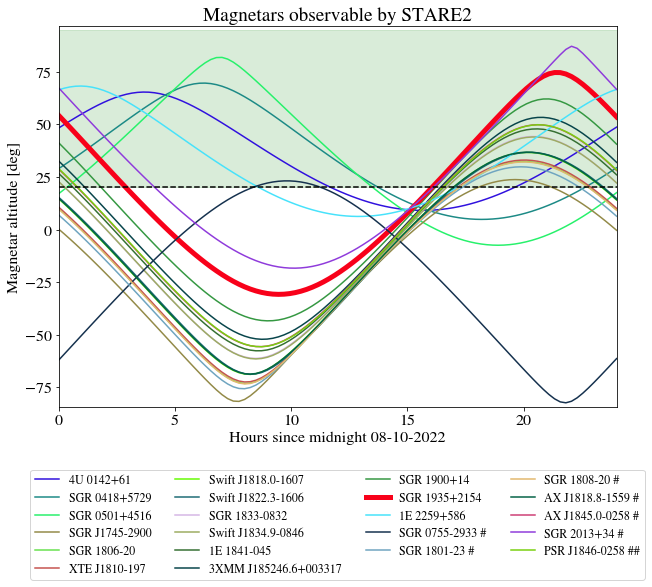

In [266]:
plt.figure(figsize=(10,7))
for i in observable_mags:
    icolor=rand(3)
    plt.plot(hours, mags_alts[i], color=icolor, label=NAMES[i], lw=lws[i])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=12)
plt.xlabel('Hours since midnight 08-10-2022')
plt.ylabel('Magnetar altitude [deg]')
plt.margins(x=0, y=0.01)
# plt.ylim(0, 90)
plt.title('Magnetars observable by STARE2')

horizon = plt.hlines(20, min(hours.value), max(hours.value), 'k', linestyles='dashed', label='STARE2 alt. limit', zorder=32)
range = plt.fill_between(hours.value, 20, 95, zorder=0, alpha=0.15, color='green', label='STARE2 observable')

plt.show();